# Modeling Notebook with Resampling

In [47]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer


from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pickle.load(open("../pickle/train.pickle", "rb"))
val = pickle.load(open("../pickle/val.pickle", "rb"))

In [3]:
train.head()

,tweet,target,tweet2
0,"[reject, constantly, house, threaten, rape, mo...",1,"'reject', 'constantly', 'house', 'threaten', '..."
1,"[convince, lame, nigger, liver, believe, cuz, ...",1,"'convince', 'lame', 'nigger', 'liver', 'believ..."
2,"[peace, fag, remember, best, lux, support, dro...",1,"'peace', 'fag', 'remember', 'best', 'lux', 'su..."
3,"[haha, ight, nig, calm, yoself]",1,"'haha', 'ight', 'nig', 'calm', 'yoself'"
4,"[tits, better, look, face, make, like, asian, ...",1,"'tits', 'better', 'look', 'face', 'make', 'lik..."


In [4]:
train.tweet = train.tweet.apply(lambda x: str(x)[1:-1]) 

In [5]:
train.target.value_counts()

0    17514
1     1072
Name: target, dtype: int64

In [6]:
train.head()

,tweet,target,tweet2
0,"'reject', 'constantly', 'house', 'threaten', '...",1,"'reject', 'constantly', 'house', 'threaten', '..."
1,"'convince', 'lame', 'nigger', 'liver', 'believ...",1,"'convince', 'lame', 'nigger', 'liver', 'believ..."
2,"'peace', 'fag', 'remember', 'best', 'lux', 'su...",1,"'peace', 'fag', 'remember', 'best', 'lux', 'su..."
3,"'haha', 'ight', 'nig', 'calm', 'yoself'",1,"'haha', 'ight', 'nig', 'calm', 'yoself'"
4,"'tits', 'better', 'look', 'face', 'make', 'lik...",1,"'tits', 'better', 'look', 'face', 'make', 'lik..."


In [7]:
val.head()

,tweet,target,tweet2
0,"[lbum, fotos, gaywrites, make, project, queer,...",1,"'lbum', 'fotos', 'gaywrites', 'make', 'project..."
1,"[yay, america, israel, jew, hat, muslim, trash...",1,"'yay', 'america', 'israel', 'jew', 'hat', 'mus..."
2,"[miss, ofay, friends, day, scar, recent, happe...",1,"'miss', 'ofay', 'friends', 'day', 'scar', 'rec..."
3,"[trash, darkskin, nigga, steal, damn, garbage]",1,"'trash', 'darkskin', 'nigga', 'steal', 'damn',..."
4,"[cody, call, people, nigger, hes, fuck, spaz]",1,"'cody', 'call', 'people', 'nigger', 'hes', 'fu..."


In [8]:
val.tweet = val.tweet.apply(lambda x: str(x)[1:-1]) 

In [9]:
X_tr = train.tweet
X_val = val.tweet
y_tr = train.target
y_val = val.target

In [10]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

## Multinomial Naive Bayes

Train Accuracy:  0.9425373937372216
Val Accuracy:  0.9426957223567393
Train F1:  0.007434944237918215
Val F1:  0.009302325581395347
Train ROC-AUC:  0.7942114325597092
Val ROC-AUC:  0.7177479383492388
Train Recall:  0.0037313432835820895
Vali Recall:  0.004672897196261682
Train Precision:  1.0
Val Precision:  1.0
Train PR-AUC:  0.304957716674489
Val PR-AUC:  0.17675788857212738


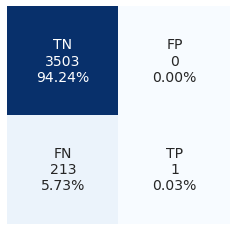

In [38]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pr_nb_tr = nb.predict(tfidf_tr)
y_pr_nb_val = nb.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_nb_tr, y_pr_nb_val, nb)

## Random Forest Classifier

Train Accuracy:  0.9975250188313785
Val Accuracy:  0.9426957223567393
Train F1:  0.9785046728971962
Val F1:  0.17120622568093385
Train ROC-AUC:  0.9994207725504031
Val ROC-AUC:  0.8303797012440606
Train Recall:  0.976679104477612
Vali Recall:  0.102803738317757
Train Precision:  0.9803370786516854
Val Precision:  0.5116279069767442
Train PR-AUC:  0.9914451739927519
Val PR-AUC:  0.32714937405990746


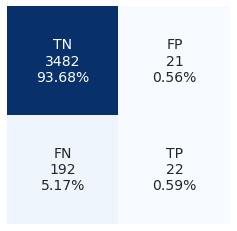

In [39]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pr_rf_tr = rf.predict(tfidf_tr)
y_pr_rf_val = rf.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_rf_tr, y_pr_rf_val, rf)

## Logistic Regression

Train Accuracy:  0.9470569245668783
Val Accuracy:  0.9443099273607748
Train F1:  0.22151898734177214
Val F1:  0.20077220077220076
Train ROC-AUC:  0.9460246834515329
Val ROC-AUC:  0.8743293465414158
Train Recall:  0.13059701492537312
Vali Recall:  0.12149532710280374
Train Precision:  0.7291666666666666
Val Precision:  0.5777777777777777
Train PR-AUC:  0.5666932304076191
Val PR-AUC:  0.355640424831512


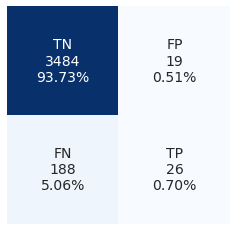

In [40]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pr_log_tr = log.predict(tfidf_tr)
y_pr_log_val = log.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_log_tr, y_pr_log_val, log)

In [41]:
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_tr)
y_pr_svc_tr = svc.predict(tfidf_tr)
y_pr_svc_val = svc.predict(tfidf_val)
get_metriks_2(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_svc_tr, y_pr_svc_val, svc)

Train Accuracy:  0.97697191434413
Val Accuracy:  0.9391982781813291
Train F1:  0.767643865363735
Val F1:  0.2709677419354839
Train Recall:  0.6595149253731343
Val Recall:  0.19626168224299065
Train Precision:  0.9181818181818182
Val Precision:  0.4375
Train PR-AUC:  0.8656932991178676
Val PR-AUC:  0.32508683821796447


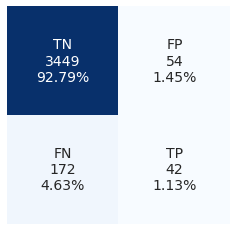

In [42]:
get_confusion(y_val, y_pr_svc_val)

Train Accuracy:  0.9485634348434305
Val Accuracy:  0.9408124831853646
Train F1:  0.36939313984168864
Val F1:  0.27152317880794696
Train ROC-AUC:  0.9477553884397812
Val ROC-AUC:  0.8074587603149235
Train Recall:  0.26119402985074625
Vali Recall:  0.19158878504672897
Train Precision:  0.6306306306306306
Val Precision:  0.4659090909090909
Train PR-AUC:  0.5448243264600504
Val PR-AUC:  0.29728776183342687


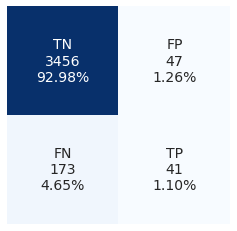

In [43]:
abc = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(tfidf_tr, y_tr)
y_pr_abc_tr = abc.predict(tfidf_tr)
y_pr_abc_val = abc.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_abc_tr, y_pr_abc_val, abc)

Train Accuracy:  0.9520068869041214
Val Accuracy:  0.9416195856873822
Train F1:  0.3117283950617284
Val F1:  0.14901960784313725
Train ROC-AUC:  0.9019775384383324
Val ROC-AUC:  0.8398568916896332
Train Recall:  0.1884328358208955
Vali Recall:  0.08878504672897196
Train Precision:  0.9017857142857143
Val Precision:  0.4634146341463415
Train PR-AUC:  0.5926955536179703
Val PR-AUC:  0.33947960774178043


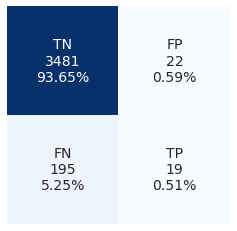

In [44]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_tr)
y_pr_gbc_tr = gbc.predict(tfidf_tr)
y_pr_gbc_val = gbc.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_gbc_tr, y_pr_gbc_val, gbc)

In [36]:
data = {'Accuracy': [accuracy(y_val, y_pr_nb_val), 
                     accuracy(y_val, y_pr_rf_val), 
                     accuracy(y_val, y_pr_log_val), 
                     accuracy(y_val, y_pr_svc_val),
                     accuracy(y_val, y_pr_abc_val),
                     accuracy(y_val, y_pr_gbc_val)],
        'F1 Score': [f1(y_val, y_pr_nb_val), 
                     f1(y_val, y_pr_rf_val), 
                     f1(y_val, y_pr_log_val), 
                     f1(y_val, y_pr_svc_val),
                     f1(y_val, y_pr_abc_val),
                     f1(y_val, y_pr_gbc_val)],
        'Recall': [recall(y_val, y_pr_nb_val), 
                   recall(y_val, y_pr_rf_val), 
                   recall(y_val, y_pr_log_val),
                   recall(y_val, y_pr_svc_val),
                   recall(y_val, y_pr_abc_val),
                   recall(y_val, y_pr_gbc_val)],
        'Precision': [precision(y_val, y_pr_nb_val), 
                      precision(y_val, y_pr_rf_val), 
                      precision(y_val, y_pr_log_val),
                      precision(y_val, y_pr_svc_val),
                      precision(y_val, y_pr_abc_val),
                      precision(y_val, y_pr_gbc_val)],
        'PR AUC': [aps(tfidf_val, y_val, nb),
                   aps(tfidf_val, y_val, rf),
                   aps(tfidf_val, y_val, log),
                   aps2(tfidf_val, y_val, svc),
                   aps(tfidf_val, y_val, abc),
                   aps(tfidf_val, y_val, gbc)]}
metrics = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Logistic Regression',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [37]:
metrics.to_csv("../data/metrics.csv")
metrics

,Accuracy,F1 Score,Recall,Precision,PR AUC
Multinomial Naive Bayes,0.942696,0.009302,0.004673,1.000000,0.176758
Random Forest,0.942696,0.190114,0.116822,0.510204,0.336623
Logistic Regression,0.944310,0.200772,0.121495,0.577778,0.355640
Support Vector Machine,0.939198,0.270968,0.196262,0.437500,0.325087
AdaBoost Classifier,0.940543,0.270627,0.191589,0.460674,0.293496
Gradient Boosting Classifier,0.941351,0.148438,0.088785,0.452381,0.346358


# Undersampling Methods

In [48]:
# separate minority and majority classes
majority = train[train.target==0]
minority = train[train.target==1]

#baseline counts
counter = Counter(y_tr)
print("Baseline: ", counter)

Baseline:  Counter({0: 17514, 1: 1072})


## RandomUnderSampler

In [49]:
rus = RandomUnderSampler()
X_tr_rus, y_tr_rus = rus.fit_sample(tfidf_tr, y_tr)
counter_rus = Counter(y_tr_rus)
print("Random Undersampler: ", counter_rus)

Random Undersampler:  Counter({0: 1072, 1: 1072})


Train Accuracy:  0.9370335820895522
Val Accuracy:  0.7175141242937854
Train F1:  0.9377018920166128
Val F1:  0.24892703862660945
Train ROC-AUC:  0.980783756126086
Val ROC-AUC:  0.8402770922653747
Train Recall:  0.9477611940298507
Vali Recall:  0.8130841121495327
Train Precision:  0.9278538812785389
Val Precision:  0.14695945945945946
Train PR-AUC:  0.9788652560930838
Val PR-AUC:  0.32407934797399074


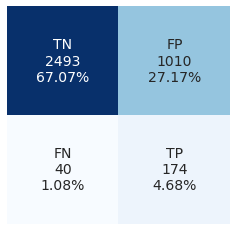

In [50]:
nb2 = MultinomialNB().fit(X_tr_rus, y_tr_rus)
y_pr_nb2_tr = nb2.predict(X_tr_rus)
y_pr_nb2_val = nb2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_nb2_tr, y_pr_nb2_val, nb2)

Train Accuracy:  0.9972014925373134
Val Accuracy:  0.7842345977939198
Train F1:  0.9971988795518207
Val F1:  0.297723292469352
Train ROC-AUC:  0.9998738235130319
Val ROC-AUC:  0.866319523185734
Train Recall:  0.996268656716418
Vali Recall:  0.794392523364486
Train Precision:  0.9981308411214953
Val Precision:  0.18318965517241378
Train PR-AUC:  0.9998824127916199
Val PR-AUC:  0.32140829331296666


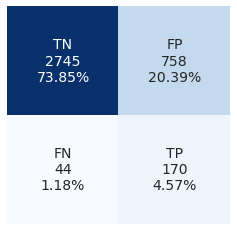

In [51]:
rf2 = RandomForestClassifier(n_estimators=100).fit(X_tr_rus, y_tr_rus)
y_pr_rf2_tr = rf2.predict(X_tr_rus)
y_pr_rf2_val = rf2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_rf2_tr, y_pr_rf2_val, rf2)

Train Accuracy:  0.9085820895522388
Val Accuracy:  0.8348130212536993
Train F1:  0.9063097514340346
Val F1:  0.3509513742071882
Train ROC-AUC:  0.9617693946313212
Val ROC-AUC:  0.8707102857097122
Train Recall:  0.8843283582089553
Vali Recall:  0.7757009345794392
Train Precision:  0.9294117647058824
Val Precision:  0.226775956284153
Train PR-AUC:  0.9573743764491933
Val PR-AUC:  0.3287004625435436


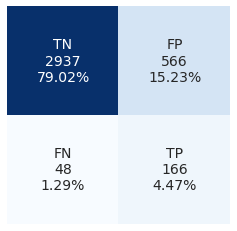

In [52]:
log2 = LogisticRegression().fit(X_tr_rus, y_tr_rus)
y_pr_log2_tr = log2.predict(X_tr_rus)
y_pr_log2_val = log2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_log2_tr, y_pr_log2_val, log2)

In [53]:
svc2 = svm.LinearSVC(random_state=42).fit(X_tr_rus, y_tr_rus)
y_pr_svc2_tr = svc2.predict(X_tr_rus)
y_pr_svc2_val = svc2.predict(tfidf_val)
get_metriks_2(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_svc2_tr, y_pr_svc2_val, svc2)

Train Accuracy:  0.9785447761194029
Val Accuracy:  0.7882701103040086
Train F1:  0.9786245353159851
Val F1:  0.29919857524487975
Train Recall:  0.9822761194029851
Val Recall:  0.7850467289719626
Train Precision:  0.975
Val Precision:  0.1848184818481848
Train PR-AUC:  0.9944970622958068
Val PR-AUC:  0.29851379734389055


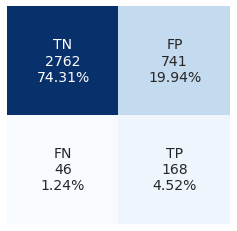

In [54]:
get_confusion(y_val, y_pr_svc2_val)

Train Accuracy:  0.9048507462686567
Val Accuracy:  0.7936507936507936
Train F1:  0.9012584704743466
Val F1:  0.2917820867959372
Train ROC-AUC:  0.9733323819336156
Val ROC-AUC:  0.8240793605481016
Train Recall:  0.8684701492537313
Vali Recall:  0.7383177570093458
Train Precision:  0.9366197183098591
Val Precision:  0.18181818181818182
Train PR-AUC:  0.9733477714907715
Val PR-AUC:  0.23353229542725612


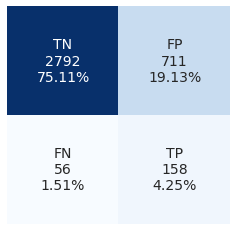

In [55]:
abc2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(X_tr_rus, y_tr_rus)
y_pr_abc2_tr = abc2.predict(X_tr_rus)
y_pr_abc2_val = abc2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_abc2_tr, y_pr_abc2_val, abc2)

Train Accuracy:  0.8283582089552238
Val Accuracy:  0.7046004842615012
Train F1:  0.8364444444444445
Val F1:  0.24794520547945206
Train ROC-AUC:  0.9239769262363556
Val ROC-AUC:  0.8565101741898132
Train Recall:  0.8777985074626866
Vali Recall:  0.8457943925233645
Train Precision:  0.7988115449915111
Val Precision:  0.14526484751203853
Train PR-AUC:  0.9295216111922384
Val PR-AUC:  0.31783610432268433


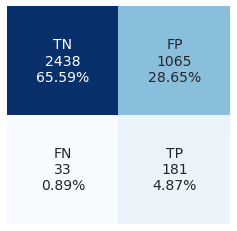

In [57]:
gbc2 = GradientBoostingClassifier().fit(X_tr_rus, y_tr_rus)
y_pr_gbc2_tr = gbc2.predict(X_tr_rus)
y_pr_gbc2_val = gbc2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_gbc2_tr, y_pr_gbc2_val, gbc2)

In [79]:
data2 = {'Accuracy': [accuracy(y_val, y_pr_nb2_val), 
                     accuracy(y_val, y_pr_rf2_val), 
                     accuracy(y_val, y_pr_log2_val), 
                     accuracy(y_val, y_pr_svc2_val),
                     accuracy(y_val, y_pr_abc2_val),
                     accuracy(y_val, y_pr_gbc2_val)],
        'F1 Score': [f1(y_val, y_pr_nb2_val), 
                     f1(y_val, y_pr_rf2_val), 
                     f1(y_val, y_pr_log2_val), 
                     f1(y_val, y_pr_svc2_val),
                     f1(y_val, y_pr_abc2_val),
                     f1(y_val, y_pr_gbc2_val)],
        'Recall': [recall(y_val, y_pr_nb2_val), 
                   recall(y_val, y_pr_rf2_val), 
                   recall(y_val, y_pr_log2_val),
                   recall(y_val, y_pr_svc2_val),
                   recall(y_val, y_pr_abc2_val),
                   recall(y_val, y_pr_gbc2_val)],
        'Precision': [precision(y_val, y_pr_nb2_val), 
                      precision(y_val, y_pr_rf2_val), 
                      precision(y_val, y_pr_log2_val),
                      precision(y_val, y_pr_svc2_val),
                      precision(y_val, y_pr_abc2_val),
                      precision(y_val, y_pr_gbc2_val)],
        'PR AUC': [aps(tfidf_val, y_val, nb2),
                   aps(tfidf_val, y_val, rf2),
                   aps(tfidf_val, y_val, log2),
                   aps2(tfidf_val, y_val, svc2),
                   aps(tfidf_val, y_val, abc2),
                   aps(tfidf_val, y_val, gbc2)]}
metrics2 = pd.DataFrame(data=data2, index = ['RUS Multinomial Naive Bayes', 
                                           'RUS Random Forest',
                                           'RUS Logistic Regression',
                                           'RUS Support Vector Machine', 
                                           'RUS AdaBoost Classifier', 
                                           'RUS Gradient Boosting Classifier'])

In [80]:
metrics2.to_csv("../data/metrics2.csv")
metrics2

,Accuracy,F1 Score,Recall,Precision,PR AUC
RUS Multinomial Naive Bayes,0.717514,0.248927,0.813084,0.146959,0.324079
RUS Random Forest,0.784235,0.297723,0.794393,0.183190,0.321408
RUS Logistic Regression,0.834813,0.350951,0.775701,0.226776,0.328700
RUS Support Vector Machine,0.788270,0.299199,0.785047,0.184818,0.298514
RUS AdaBoost Classifier,0.793651,0.291782,0.738318,0.181818,0.233532
RUS Gradient Boosting Classifier,0.704600,0.247945,0.845794,0.145265,0.317836


## Condensed Nearest Neighbour

In [59]:
cnn = CondensedNearestNeighbour(n_neighbors=2)
X_tr_cnn, y_tr_cnn = cnn.fit_resample(tfidf_tr, y_tr)
counter_cnn = Counter(y_tr_cnn)
print("Condensed Nearest Neighbors: ", counter_cnn)

Condensed Nearest Neighbors:  Counter({0: 1236, 1: 1072})


Train Accuracy:  0.8635181975736569
Val Accuracy:  0.8681732580037664
Train F1:  0.8438274665344572
Val F1:  0.32132963988919666
Train ROC-AUC:  0.9383618919963291
Val ROC-AUC:  0.7960279706846735
Train Recall:  0.7938432835820896
Vali Recall:  0.5420560747663551
Train Precision:  0.9005291005291005
Val Precision:  0.2283464566929134
Train PR-AUC:  0.9144972120365418
Val PR-AUC:  0.2722319626364612


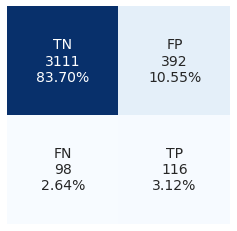

In [60]:
nb3 = MultinomialNB().fit(X_tr_cnn, y_tr_cnn)
y_pr_nb3_tr = nb3.predict(X_tr_cnn)
y_pr_nb3_val = nb3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_nb3_tr, y_pr_nb3_val, nb3)

Train Accuracy:  0.987001733102253
Val Accuracy:  0.8899650255582459
Train F1:  0.9860724233983286
Val F1:  0.36391912908242613
Train ROC-AUC:  0.9985215005071729
Val ROC-AUC:  0.8332664125009005
Train Recall:  0.9906716417910447
Vali Recall:  0.5467289719626168
Train Precision:  0.9815157116451017
Val Precision:  0.2727272727272727
Train PR-AUC:  0.997920481586303
Val PR-AUC:  0.31329623347675917


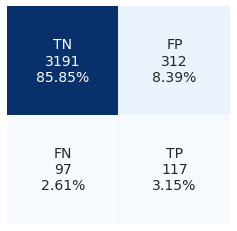

In [61]:
rf3 = RandomForestClassifier(n_estimators=100).fit(X_tr_cnn, y_tr_cnn)
y_pr_rf3_tr = rf3.predict(X_tr_cnn)
y_pr_rf3_val = rf3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_rf3_tr, y_pr_rf3_val, rf3)

Train Accuracy:  0.8310225303292894
Val Accuracy:  0.8902340597255851
Train F1:  0.8084479371316307
Val F1:  0.3799392097264438
Train ROC-AUC:  0.9070628350963628
Val ROC-AUC:  0.8608535807758904
Train Recall:  0.7677238805970149
Vali Recall:  0.5841121495327103
Train Precision:  0.8537344398340249
Val Precision:  0.28153153153153154
Train PR-AUC:  0.8505802836773416
Val PR-AUC:  0.3207773510448618


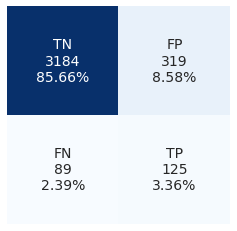

In [62]:
log3 = LogisticRegression().fit(X_tr_cnn, y_tr_cnn)
y_pr_log3_tr = log3.predict(X_tr_cnn)
y_pr_log3_val = log3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_log3_tr, y_pr_log3_val, log3)

In [63]:
svc3 = svm.LinearSVC(random_state=42).fit(X_tr_cnn, y_tr_cnn)
y_pr_svc3_tr = svc3.predict(X_tr_cnn)
y_pr_svc3_val = svc3.predict(tfidf_val)
get_metriks_2(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_svc3_tr, y_pr_svc3_val, svc3)

Train Accuracy:  0.9436741767764298
Val Accuracy:  0.8428840462738768
Train F1:  0.9400921658986174
Val F1:  0.3129411764705883
Train Recall:  0.9514925373134329
Val Recall:  0.6214953271028038
Train Precision:  0.9289617486338798
Val Precision:  0.20911949685534592
Train PR-AUC:  0.9574413186565042
Val PR-AUC:  0.24772196566579668


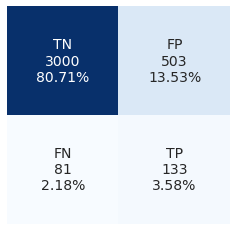

In [64]:
get_confusion(y_val, y_pr_svc3_val)

Train Accuracy:  0.8275563258232236
Val Accuracy:  0.8087167070217918
Train F1:  0.8117313150425733
Val F1:  0.2692702980472765
Train ROC-AUC:  0.9201448008742693
Val ROC-AUC:  0.7608371729438852
Train Recall:  0.8003731343283582
Vali Recall:  0.6121495327102804
Train Precision:  0.8234165067178503
Val Precision:  0.1725955204216074
Train PR-AUC:  0.9141415846823372
Val PR-AUC:  0.17685073516934446


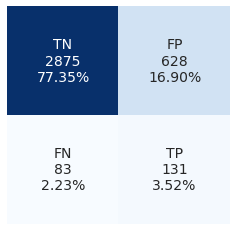

In [65]:
abc3 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(X_tr_cnn, y_tr_cnn)
y_pr_abc3_tr = abc3.predict(X_tr_cnn)
y_pr_abc3_val = abc3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_abc3_tr, y_pr_abc3_val, abc3)

Train Accuracy:  0.7811958405545927
Val Accuracy:  0.8878127522195319
Train F1:  0.7384774728120145
Val F1:  0.37853949329359166
Train ROC-AUC:  0.8678358058010917
Val ROC-AUC:  0.8387550324021333
Train Recall:  0.6651119402985075
Vali Recall:  0.5934579439252337
Train Precision:  0.830034924330617
Val Precision:  0.2778993435448578
Train PR-AUC:  0.8552059276760523
Val PR-AUC:  0.30107826272479077


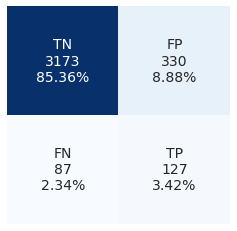

In [66]:
gbc3 = GradientBoostingClassifier().fit(X_tr_cnn, y_tr_cnn)
y_pr_gbc3_tr = gbc3.predict(X_tr_cnn)
y_pr_gbc3_val = gbc3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_gbc3_tr, y_pr_gbc3_val, gbc3)

In [81]:
data3 = {'Accuracy': [accuracy(y_val, y_pr_nb3_val), 
                     accuracy(y_val, y_pr_rf3_val), 
                     accuracy(y_val, y_pr_log3_val), 
                     accuracy(y_val, y_pr_svc3_val),
                     accuracy(y_val, y_pr_abc3_val),
                     accuracy(y_val, y_pr_gbc3_val)],
        'F1 Score': [f1(y_val, y_pr_nb3_val), 
                     f1(y_val, y_pr_rf3_val), 
                     f1(y_val, y_pr_log3_val), 
                     f1(y_val, y_pr_svc3_val),
                     f1(y_val, y_pr_abc3_val),
                     f1(y_val, y_pr_gbc3_val)],
        'Recall': [recall(y_val, y_pr_nb3_val), 
                   recall(y_val, y_pr_rf3_val), 
                   recall(y_val, y_pr_log3_val),
                   recall(y_val, y_pr_svc3_val),
                   recall(y_val, y_pr_abc3_val),
                   recall(y_val, y_pr_gbc3_val)],
        'Precision': [precision(y_val, y_pr_nb3_val), 
                      precision(y_val, y_pr_rf3_val), 
                      precision(y_val, y_pr_log3_val),
                      precision(y_val, y_pr_svc3_val),
                      precision(y_val, y_pr_abc3_val),
                      precision(y_val, y_pr_gbc3_val)],
        'PR AUC': [aps(tfidf_val, y_val, nb3),
                   aps(tfidf_val, y_val, rf3),
                   aps(tfidf_val, y_val, log3),
                   aps2(tfidf_val, y_val, svc3),
                   aps(tfidf_val, y_val, abc3),
                   aps(tfidf_val, y_val, gbc3)]}
metrics3 = pd.DataFrame(data=data3, index = ['CNN Multinomial Naive Bayes', 
                                           'CNN Random Forest',
                                           'CNN Logistic Regression',
                                           'CNN Support Vector Machine', 
                                           'CNN AdaBoost Classifier', 
                                           'CNN Gradient Boosting Classifier'])

In [82]:
metrics3.to_csv("../data/metrics3.csv")
metrics3

,Accuracy,F1 Score,Recall,Precision,PR AUC
CNN Multinomial Naive Bayes,0.868173,0.321330,0.542056,0.228346,0.272232
CNN Random Forest,0.889965,0.363919,0.546729,0.272727,0.313296
CNN Logistic Regression,0.890234,0.379939,0.584112,0.281532,0.320777
CNN Support Vector Machine,0.842884,0.312941,0.621495,0.209119,0.247722
CNN AdaBoost Classifier,0.808717,0.269270,0.612150,0.172596,0.176851
CNN Gradient Boosting Classifier,0.887813,0.378539,0.593458,0.277899,0.301078


## SMOTE-ENN

In [67]:
sme = SMOTEENN(sampling_strategy="minority")
X_tr_sme, y_tr_sme = sme.fit_sample(tfidf_tr, y_tr)
counter_sme = Counter(y_tr_sme)
print("SMOTE-ENN: ", counter_sme)

SMOTE-ENN:  Counter({1: 17397, 0: 15841})


Train Accuracy:  0.9488236355978097
Val Accuracy:  0.7998385794995965
Train F1:  0.953009751650598
Val F1:  0.27485380116959063
Train ROC-AUC:  0.9943466878021474
Val ROC-AUC:  0.7976981012269857
Train Recall:  0.9914927861125481
Vali Recall:  0.6588785046728972
Train Precision:  0.9174024039995745
Val Precision:  0.17364532019704434
Train PR-AUC:  0.9947936566786593
Val PR-AUC:  0.2972061393928781


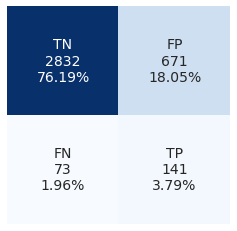

In [68]:
nb4 = MultinomialNB().fit(X_tr_sme, y_tr_sme)
y_pr_nb4_tr = nb4.predict(X_tr_sme)
y_pr_nb4_val = nb4.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_nb4_tr, y_pr_nb4_val, nb4)

Train Accuracy:  1.0
Val Accuracy:  0.9249394673123487
Train F1:  1.0
Val F1:  0.39999999999999997
Train ROC-AUC:  1.0
Val ROC-AUC:  0.8577707759170378
Train Recall:  1.0
Vali Recall:  0.43457943925233644
Train Precision:  1.0
Val Precision:  0.3705179282868526
Train PR-AUC:  1.0
Val PR-AUC:  0.31776593899270716


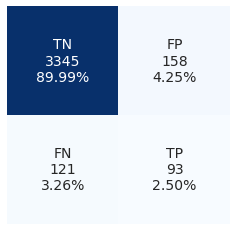

In [69]:
rf4 = RandomForestClassifier(n_estimators=100).fit(X_tr_sme, y_tr_sme)
y_pr_rf4_tr = rf4.predict(X_tr_sme)
y_pr_rf4_val = rf4.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_rf4_tr, y_pr_rf4_val, rf4)

Train Accuracy:  0.9488236355978097
Val Accuracy:  0.7998385794995965
Train F1:  0.953009751650598
Val F1:  0.27485380116959063
Train ROC-AUC:  0.9923437912603918
Val ROC-AUC:  0.8560472865714568
Train Recall:  0.9914927861125481
Vali Recall:  0.6588785046728972
Train Precision:  0.9174024039995745
Val Precision:  0.17364532019704434
Train PR-AUC:  0.9916322946409049
Val PR-AUC:  0.3135691087447256


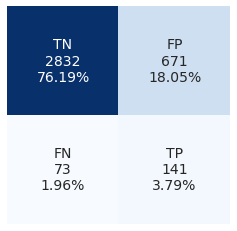

In [70]:
log4 = LogisticRegression().fit(X_tr_sme, y_tr_sme)
y_pr_log4_tr = nb4.predict(X_tr_sme)
y_pr_log4_val = nb4.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_log4_tr, y_pr_log4_val, log4)

In [71]:
svc4 = svm.LinearSVC(random_state=42).fit(X_tr_sme, y_tr_sme)
y_pr_svc4_tr = svc4.predict(X_tr_sme)
y_pr_svc4_val = svc4.predict(tfidf_val)
get_metriks_2(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_svc4_tr, y_pr_svc4_val, svc4)

Train Accuracy:  0.9923882303387689
Val Accuracy:  0.8875437180521927
Train F1:  0.9927683292839788
Val F1:  0.3549382716049383
Train Recall:  0.9982180835776283
Val Recall:  0.5373831775700935
Train Precision:  0.9873777575619741
Val Precision:  0.26497695852534564
Train PR-AUC:  0.9987203442771114
Val PR-AUC:  0.2927430581345089


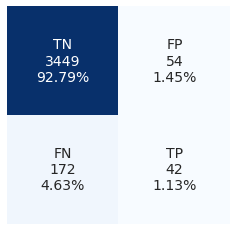

In [74]:
get_confusion(y_val, y_pr_svc_val)

Train Accuracy:  0.8323605511763644
Val Accuracy:  0.8087167070217918
Train F1:  0.834717607973422
Val F1:  0.2692702980472765
Train ROC-AUC:  0.9891248744942036
Val ROC-AUC:  0.8404445055106303
Train Recall:  0.8087601310570788
Vali Recall:  0.6121495327102804
Train Precision:  0.8623965675758505
Val Precision:  0.1725955204216074
Train PR-AUC:  0.9902168928267765
Val PR-AUC:  0.27693935156718635


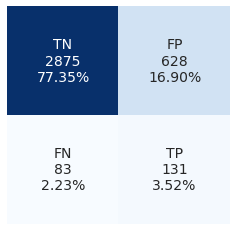

In [72]:
abc4 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(X_tr_sme, y_tr_sme)
y_pr_abc4_tr = abc3.predict(X_tr_sme)
y_pr_abc4_val = abc3.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_abc4_tr, y_pr_abc4_val, abc4)

Train Accuracy:  0.9101931524159095
Val Accuracy:  0.8827011030400861
Train F1:  0.9117881734093796
Val F1:  0.3681159420289855
Train ROC-AUC:  0.9652288368173526
Val ROC-AUC:  0.8468669044690667
Train Recall:  0.886762085417026
Vali Recall:  0.5934579439252337
Train Precision:  0.9382678506264445
Val Precision:  0.2668067226890756
Train PR-AUC:  0.9681632241171156
Val PR-AUC:  0.3185887921115564


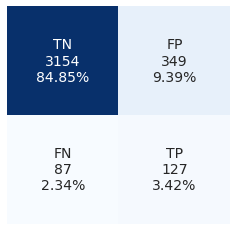

In [73]:
gbc4 = GradientBoostingClassifier().fit(X_tr_sme, y_tr_sme)
y_pr_gbc4_tr = gbc4.predict(X_tr_sme)
y_pr_gbc4_val = gbc4.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_gbc4_tr, y_pr_gbc4_val, gbc4)

In [83]:
data4 = {'Accuracy': [accuracy(y_val, y_pr_nb4_val), 
                     accuracy(y_val, y_pr_rf4_val), 
                     accuracy(y_val, y_pr_log4_val), 
                     accuracy(y_val, y_pr_svc4_val),
                     accuracy(y_val, y_pr_abc4_val),
                     accuracy(y_val, y_pr_gbc4_val)],
        'F1 Score': [f1(y_val, y_pr_nb4_val), 
                     f1(y_val, y_pr_rf4_val), 
                     f1(y_val, y_pr_log4_val), 
                     f1(y_val, y_pr_svc4_val),
                     f1(y_val, y_pr_abc4_val),
                     f1(y_val, y_pr_gbc4_val)],
        'Recall': [recall(y_val, y_pr_nb4_val), 
                   recall(y_val, y_pr_rf4_val), 
                   recall(y_val, y_pr_log4_val),
                   recall(y_val, y_pr_svc4_val),
                   recall(y_val, y_pr_abc4_val),
                   recall(y_val, y_pr_gbc4_val)],
        'Precision': [precision(y_val, y_pr_nb4_val), 
                      precision(y_val, y_pr_rf4_val), 
                      precision(y_val, y_pr_log4_val),
                      precision(y_val, y_pr_svc4_val),
                      precision(y_val, y_pr_abc4_val),
                      precision(y_val, y_pr_gbc4_val)],
        'PR AUC': [aps(tfidf_val, y_val, nb4),
                   aps(tfidf_val, y_val, rf4),
                   aps(tfidf_val, y_val, log4),
                   aps2(tfidf_val, y_val, svc4),
                   aps(tfidf_val, y_val, abc4),
                   aps(tfidf_val, y_val, gbc4)]}
metrics4 = pd.DataFrame(data=data4, index = ['Sm-ENN Multinomial Naive Bayes', 
                                           'Sm-ENNR andom Forest',
                                           'Sm-ENN Logistic Regression',
                                           'Sm-ENN Support Vector Machine', 
                                           'Sm-ENN AdaBoost Classifier', 
                                           'Sm-ENN Gradient Boosting Classifier'])

In [84]:
metrics4.to_csv("../data/metrics4.csv")
metrics4

,Accuracy,F1 Score,Recall,Precision,PR AUC
Sm-ENN Multinomial Naive Bayes,0.799839,0.274854,0.658879,0.173645,0.297206
Sm-ENNR andom Forest,0.924939,0.400000,0.434579,0.370518,0.317766
Sm-ENN Logistic Regression,0.799839,0.274854,0.658879,0.173645,0.313569
Sm-ENN Support Vector Machine,0.887544,0.354938,0.537383,0.264977,0.292743
Sm-ENN AdaBoost Classifier,0.808717,0.269270,0.612150,0.172596,0.276939
Sm-ENN Gradient Boosting Classifier,0.882701,0.368116,0.593458,0.266807,0.318589
